In [1]:
import pandas as pd
import numpy as np
import quandl

In [2]:
start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('2020-08-09')

In [39]:
# Enter your Quandl API key
quandl.ApiConfig.api_key = '****'

f = quandl.get('WIKI/F.11',start_date=start,end=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end=end)
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end=end)
nflx = quandl.get('WIKI/NFLX.11',start_date=start,end=end)
goog = quandl.get('WIKI/GOOG.11',start_date=start,end=end)

In [40]:
for stock_df in (f,amzn,aapl,nflx,goog):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [44]:
for stock_df , allo in zip((f,amzn,aapl,nflx,goog),[.2,.5,.1,.1,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [45]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2015-01-02,103.863957,1.000000,0.100000,100000.000000
2015-01-05,100.937944,0.971828,0.097183,97182.840940
2015-01-06,100.947444,0.971920,0.097192,97191.987561
2015-01-07,102.362951,0.985548,0.098555,98554.833989
2015-01-08,106.295968,1.023415,0.102342,102341.534803


In [46]:
# Applying 1M to portfolio
for stock_df in (f,amzn,aapl,nflx,goog):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [48]:
all_pos_vals = [f['Position Values'],amzn['Position Values'],aapl['Position Values'],nflx['Position Values'],goog['Position Values']]

portfolio_val = pd.concat(all_pos_vals,axis=1)

In [49]:
portfolio_val.columns = ['F Pos', 'AMZN Pos', 'AAPL Pos','NFLX Pos','GOOG Pos']

In [50]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [55]:
portfolio_val.tail()

,F Pos,AMZN Pos,AAPL Pos,NFLX Pos,GOOG Pos,Total Pos
Date,,,,,,
2018-03-21,169830.998816,2.563626e+06,164898.396470,634882.787872,207861.892876,3.741100e+06
2018-03-22,164475.967321,2.502431e+06,162563.611561,615263.369061,199897.105619,3.644631e+06
2018-03-23,161568.950225,2.423765e+06,158803.885758,603708.373932,194655.208552,3.542501e+06
2018-03-26,165699.974520,2.521490e+06,166342.593322,642646.300224,200684.057087,3.696863e+06
2018-03-27,165699.974520,2.426180e+06,162077.398621,603206.855047,191516.929937,3.548681e+06


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

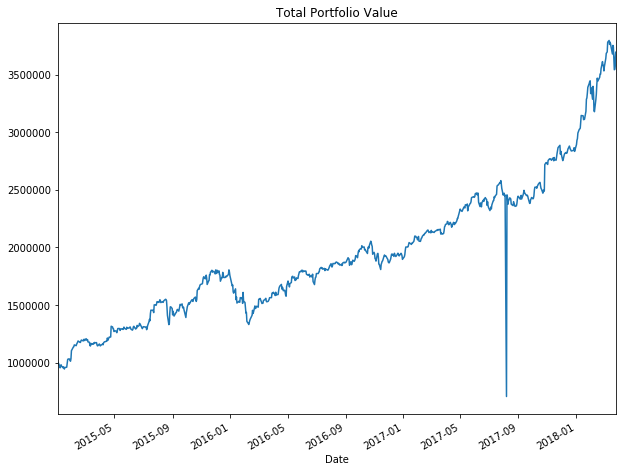

In [53]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

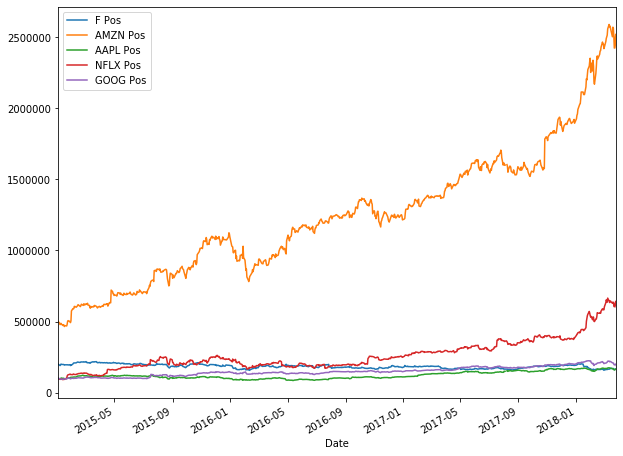

In [54]:
portfolio_val.drop('Total Pos',axis=1).plot(figsize=(10,8))